<a href="https://colab.research.google.com/github/mohamedchahed/ML-projects/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Background

The dataset being used in this study is sourced from a telecom company based in Iran. The dataset includes information on customer behavior over a one-year period, with each row representing a different customer. In addition to a churn label, the dataset also includes data on various activities undertaken by the customers, such as call failures and subscription length. The aim of the study is to analyze this dataset and explore patterns or trends that may help the company improve customer retention rates. This type of analysis is important for telecom companies to ensure that they are providing high-quality services and meeting the needs of their customers. By leveraging the insights gained from this analysis, the company can make informed decisions and take proactive measures to reduce customer churn and improve overall customer satisfaction.

# 💾 Data

In [29]:
import pandas as pd
df = pd.read_csv('/customer_churn.csv')
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


This dataset contains information for 3150 customers of an Iranian telecom company, collected randomly over 12 months. The dataset consists of 13 columns, including call failures, frequency of SMS, number of complaints, subscription length, age group, charge amount, type of service, seconds of use, status, frequency of use, and customer value. All attributes except churn represent data from the first 9 months, with churn labels representing customer states at the end of the 12 months, leaving a 3-month planning gap. The dataset aims to help the company improve customer retention rates and satisfaction through analysis of customer behavior.



---


| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |


---



Source : https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset

# 📊 EDA


### Anomalies

#### Missing values

In [4]:
# check for missing values
df.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

#### Outliers Detection with Z-score

In [13]:
import numpy as np
# Calculate the mean and standard deviation for each variable
mean_call_failure = df['Call Failure'].mean()
std_call_failure = df['Call Failure'].std()

mean_subscription_length = df['Subscription Length'].mean()
std_subscription_length = df['Subscription Length'].std()

mean_seconds_of_use = df['Seconds of Use'].mean()
std_seconds_of_use = df['Seconds of Use'].std()

mean_frequency_of_use = df['Frequency of use'].mean()
std_frequency_of_use = df['Frequency of use'].std()

mean_frequency_of_SMS = df['Frequency of SMS'].mean()
std_frequency_of_SMS = df['Frequency of SMS'].std()

mean_distinct_called_numbers = df['Distinct Called Numbers'].mean()
std_distinct_called_numbers = df['Distinct Called Numbers'].std()

mean_customer_value = df['Customer Value'].mean()
std_customer_value = df['Customer Value'].std()

# Calculate the Z-scores for all data points
z_scores_call_failure = np.abs((df['Call Failure'] - mean_call_failure) / std_call_failure)
z_scores_subscription_length = np.abs((df['Subscription Length'] - mean_subscription_length) / std_subscription_length)
z_scores_seconds_of_use = np.abs((df['Seconds of Use'] - mean_seconds_of_use) / std_seconds_of_use)
z_scores_frequency_of_use = np.abs((df['Frequency of use'] - mean_frequency_of_use) / std_frequency_of_use)
z_scores_frequency_of_SMS = np.abs((df['Frequency of SMS'] - mean_frequency_of_SMS) / std_frequency_of_SMS)
z_scores_distinct_called_numbers = np.abs((df['Distinct Called Numbers'] - mean_distinct_called_numbers) / std_distinct_called_numbers)
z_scores_customer_value = np.abs((df['Customer Value'] - mean_customer_value) / std_customer_value)

# Set threshold for detecting outliers
outliers_call_failure = df[z_scores_call_failure > 3.5]
outliers_subscription_length = df[z_scores_subscription_length > 3.5]
outliers_seconds_of_use = df[z_scores_seconds_of_use > 3.5]
outliers_frequency_of_use = df[z_scores_frequency_of_use > 3.5]
outliers_frequency_of_SMS = df[z_scores_frequency_of_SMS > 3.5]
outliers_distinct_called_numbers = df[z_scores_distinct_called_numbers > 3.5]
outliers_customer_value = df[z_scores_customer_value > 3.5]

# Print the results
print(outliers_call_failure['Call Failure'])
print(outliers_subscription_length['Subscription Length'])
print(outliers_seconds_of_use['Seconds of Use'])
print(outliers_frequency_of_use['Frequency of use'])
print(outliers_frequency_of_SMS['Frequency of SMS'])
print(outliers_distinct_called_numbers['Distinct Called Numbers'])
print(outliers_customer_value['Customer Value'])

2362    35
2383    35
2562    34
2583    34
2962    36
2972    34
2983    36
Name: Call Failure, dtype: int64
Series([], Name: Subscription Length, dtype: int64)
Series([], Name: Seconds of Use, dtype: int64)
Series([], Name: Frequency of use, dtype: int64)
13      483
63      488
113     478
163     493
213     473
263     498
313     468
363     494
413     472
463     504
563     515
663     492
713     474
763     475
813     491
863     491
963     483
1013    483
1063    476
1113    481
1163    471
1213    486
1313    491
1413    487
1513    497
1613    508
1713    485
1763    467
1813    468
1863    484
1913    484
2013    476
2063    476
2113    490
2163    495
2213    485
2263    500
2313    480
2363    505
2413    475
2463    501
2513    479
2563    511
2613    469
2663    522
2763    499
2813    481
2863    482
2913    498
2963    498
3063    490
3113    490
Name: Frequency of SMS, dtype: int64
183     84
283     86
383     85
483     95
583     84
1333    84
1533    93
2183

Based on the Z-score method, we have detected some outliers in the numerical columns of our dataset. However, after reviewing these outliers, there is no evidence to suggest that these values are incorrect or outliers in the traditional sense. Therefore, we can conclude that the outliers detected by the Z-score method are valid data points and should not be removed or modified.

### Univariate Analysis

#### Distributions 

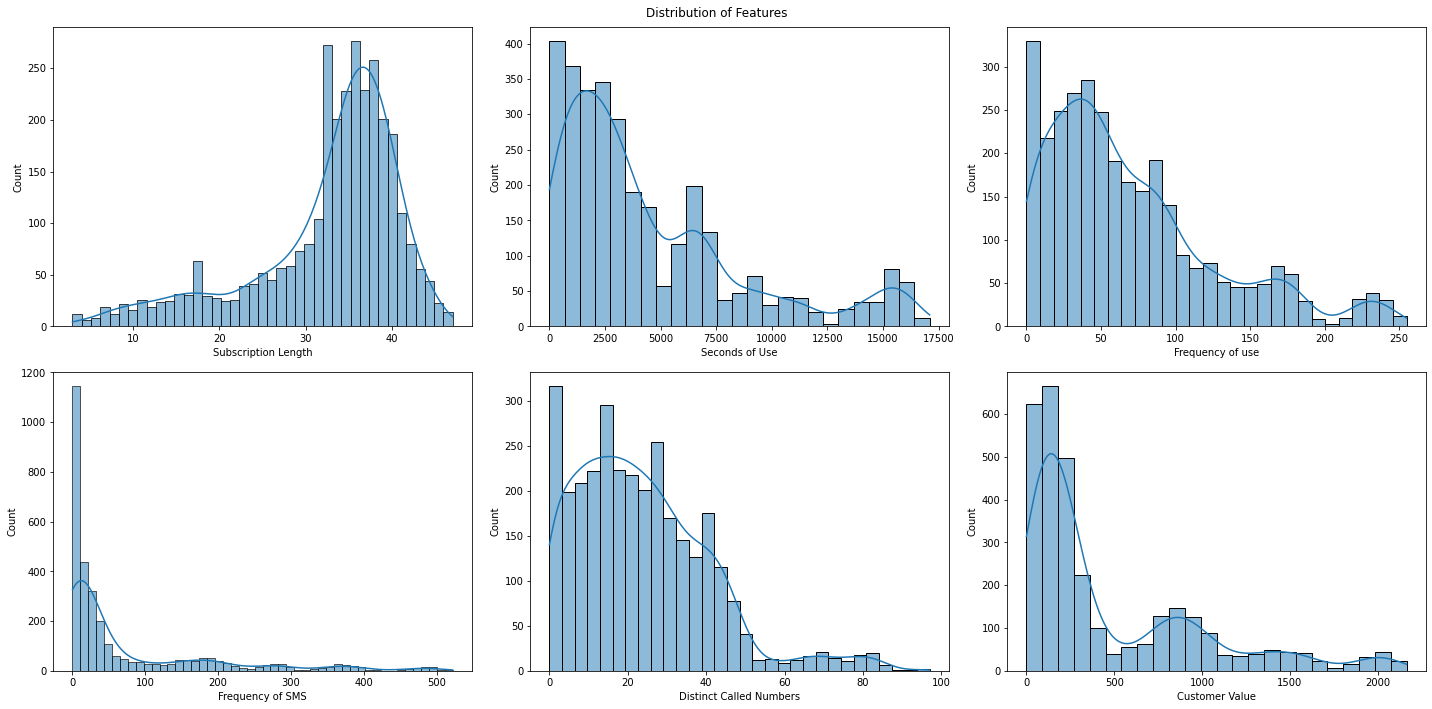

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
cols = ['Subscription Length', 'Seconds of Use',
        'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
        'Customer Value']

# Set the figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.flatten()

# Plot the distribution of each column
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    
# Add titles and adjust spacing
plt.suptitle('Distribution of Features')
plt.tight_layout()

After plotting the distributions and observing that they are skewed, it's clear that preprocessing is needed to make the data more suitable for modeling. Skewed data can cause issues with statistical methods and make it difficult to identify meaningful patterns in the data. Therefore, it's important to transform the data to reduce the impact of outliers and bring the distribution closer to a normal distribution.



#### Target Feature Label Imbalance

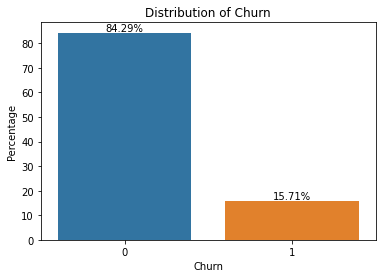

In [30]:
# Barplot
ax = sns.barplot(x='Churn', y='Churn', data=df, estimator=lambda x: len(x) / len(df) * 100)

# Adding labels and title
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Distribution of Churn')

# Adding percentage values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            '{:.2f}%'.format(p.get_height()), 
            ha='center', 
            va='bottom')

plt.show()

It is clear that the target feature 'churn' is imbalanced, with a higher proportion of customers not churning compared to those who do. This imbalance can pose a problem during the modeling stage, as most machine learning algorithms are designed to maximize accuracy and may be biased towards the majority class. To address this issue, we need to use resampling techniques such as oversampling or undersampling to balance the classes in the training data.

### Multivariate Analysis

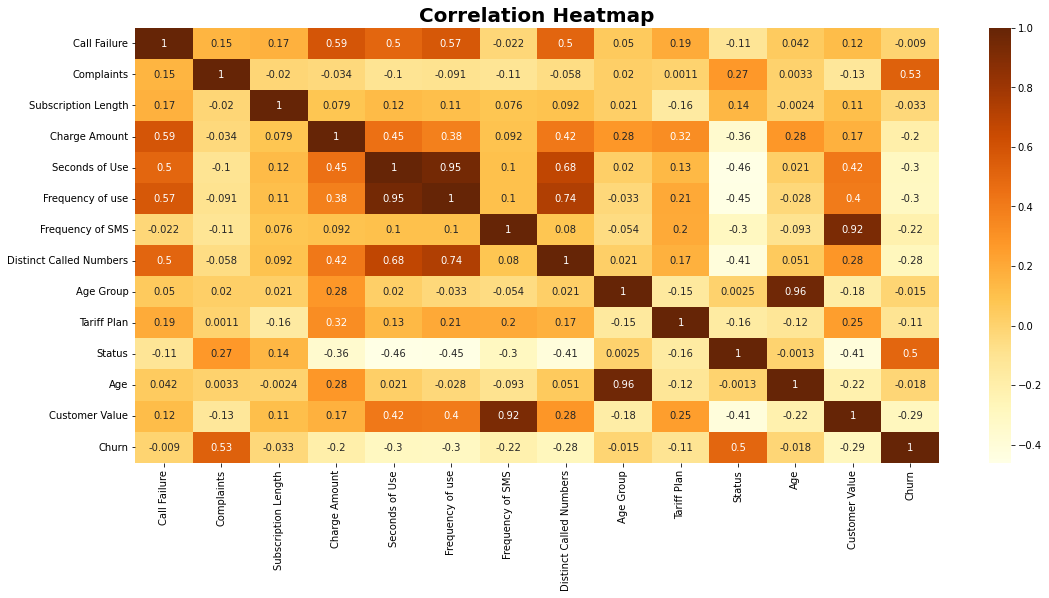

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlations analysis
#plot
cmap = sns.color_palette('YlOrBr', as_cmap=True)

plt.figure(figsize = (18, 8))
sns.heatmap(data = df.corr(), annot = True, cmap = cmap)

#customize
plt.title('Correlation Heatmap',fontsize = 20, fontweight = 'bold')

plt.show() 

we can observe that there is a high positive correlation between the `customer value` and the `frequency of SMS` as well as `seconds of use`, and `frequency of use` variables. 

the high correlation between some of the numerical variables may lead to `multicollinearity` issues which need to be adressed during the modeling stage.

Moreover, we have found that `the status` and `complaints` variables have a strong correlation with the target variable `churn`. This may indicates that customers who have complaints or are non-active are more likely to churn.

# 🔢 Clustering 

In [ ]:
from pycaret.clustering import *
# Set up Pycaret environment for clustering 
cluster_setup = setup(df, 
                      normalize = True, # Normalize the data
                      pca = True, # Perform PCA dimensionality reduction
                      pca_method = 'linear', # Use linear PCA
                      pca_components = 2, # Reduce to 2 principal components
                      ignore_features = ['Age Group','Status','Tariff Plan','Age','Churn','Complaints','Call Failure'], # Ignore any features you don't want to use
                      session_id = 123) # Set a random seed for reproducibility

,Description,Value
0,Session id,123
1,Original data shape,"(3150, 14)"
2,Transformed data shape,"(3150, 2)"
3,Ignore features,7
4,Numeric features,7
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# Define list of clustering models and their hyperparameters
models = {
    'kmeans': {'num_clusters': [2,3, 4, 5, 6, 7]},
    'sc': {'num_clusters': [2,3, 4, 5, 6, 7]},
    'hclust': {'linkage': ['ward', 'complete', 'average']},
    'dbscan': {'eps': [0.1, 0.3,0.5,0.7,0.9]},
}

# Train and evaluate clustering models
for model_name, hyperparams in models.items():
    for param_name, param_values in hyperparams.items():
        for param_value in param_values:
            hyperparam_dict = {param_name: param_value}
            model = create_model(model_name, **hyperparam_dict)
            print(model_name, hyperparam_dict)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5057,2808.0983,0.9302,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 2}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5555,3673.9084,0.7598,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 3}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4799,3868.3453,0.6860,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 4}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4988,3957.0288,0.7475,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 5}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5119,4230.1284,0.7319,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 6}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4970,4595.6996,0.7074,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans {'num_clusters': 7}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4889,855.5807,0.6780,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 2}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4721,1292.3122,0.5963,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 3}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4211,774.9022,0.6763,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 4}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3275,611.2189,0.6765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 5}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4834,1919.7434,0.6099,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 6}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4763,1657.9394,0.6243,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sc {'num_clusters': 7}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4479,3308.5303,0.7252,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

hclust {'linkage': 'ward'}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4630,2225.8708,0.7281,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

hclust {'linkage': 'complete'}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4827,2821.3919,0.8490,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

hclust {'linkage': 'average'}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0353,96.7832,1.4047,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

dbscan {'eps': 0.1}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2625,320.5960,1.5611,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

dbscan {'eps': 0.3}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4951,292.4776,0.4467,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

dbscan {'eps': 0.5}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

dbscan {'eps': 0.7}


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

dbscan {'eps': 0.9}




> These three indices are commonly used to evaluate the quality of clustering algorithms. 


*  `Silhouette score` : A measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better cluster quality.
*   `Calinski-Harabasz`: An index that measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.
* `Davies-Bouldin`: A measure of the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.





* the `k-means` clustering algorithm with `3 clusters` seems to perform the best among the tested clustering algorithms. It has the `highest silhouette score`, which indicates that the clusters are well separated and data points are assigned to the correct cluster. It also has a `high Calinski-Harabasz score`, which is an indicator of the compactness and separation between clusters. `The Davies-Bouldin` score is also quite good, indicating that the clusters are well separated and distinct.


* `hierarchical clustering` with ward linkage also shows promising results, exhibiting a high silhouette score and low Davies-Bouldin score. Since hierarchical clustering does not require us to specify the number of clusters beforehand, we can plot the `dendrogram` to visualize the hierarchical structure of the clustering and pick the `optimal number of clusters`

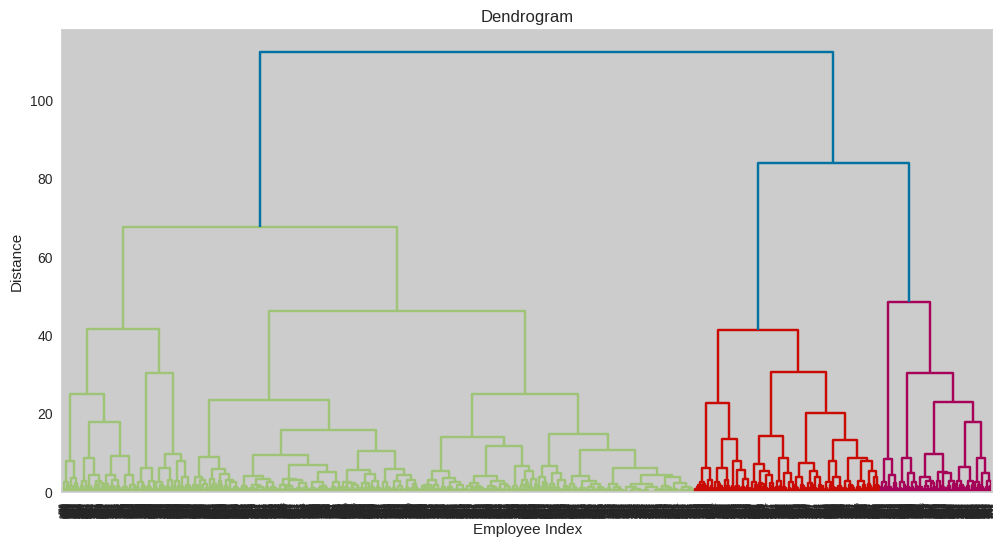

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
X = df.drop(['Age Group','Status','Tariff Plan','Age','Churn','Complaints','Call Failure'],axis=1)
X_scaled = scaler.fit_transform(X)
# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Employee Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Creating the k-means model with the optimal number of clusters 
kmeans = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5555,3673.9084,0.7598,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Plotting clusters using PCA for dimensionality reduction
plot_model(kmeans, plot = 'cluster', scale = 2)

In [ ]:
# Plotting the distribution of each cluster
plot_model(kmeans, plot = 'distribution', scale = 2)

In [ ]:
# Assigning each observation to a cluster
kmeans_cluster = assign_model(kmeans)
kmeans_cluster.head()

,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value,Cluster
0,38,0,4370,71,5,17,197.639999,Cluster 0
1,39,0,318,5,7,4,46.035000,Cluster 0
2,37,0,2453,60,359,24,1536.520020,Cluster 2
3,38,0,4198,66,1,35,240.020004,Cluster 0
4,38,0,2393,58,2,33,145.804993,Cluster 0


In [ ]:
# Calculating means for each variable 
means_by_cluster = kmeans_cluster.groupby('Cluster').mean()
means_by_cluster


,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
Cluster,,,,,,,
Cluster 0,32.145963,0.428571,2266.949793,40.776915,18.013458,16.596791,161.951462
Cluster 1,33.242029,2.247826,10794.575362,151.894203,61.502899,43.457971,651.215210
Cluster 2,33.075758,1.119318,4280.765152,66.691288,290.268939,22.736742,1366.166626


In [ ]:
# Creating the hclust model with optimal params 
hclust = create_model('hclust', linkage = "ward", num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5296,3124.8834,0.7873,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Plotting clusters using PCA for dimensionality reduction
plot_model(hclust, plot = 'cluster', scale = 2)

In [ ]:
# Plotting the distribution of each cluster
plot_model(hclust, plot = 'distribution', scale = 2)

In [ ]:
# Assigning each observation to a cluster
hc_cluster = assign_model(hclust)
# Calculating means for each variable 
means_by_cluster_hc = hc_cluster.groupby('Cluster').mean()
means_by_cluster_hc


,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
Cluster,,,,,,,
Cluster 0,31.840686,0.519608,2564.927941,47.279412,17.636275,18.302451,166.925690
Cluster 1,32.494624,0.811828,4070.956989,60.498208,269.327957,21.767025,1273.612061
Cluster 2,35.181159,2.639493,11927.900362,160.494565,80.141304,44.516304,783.262268




> Intepretation:

Here's a possible interpretation for hierarchical clustering results :

* `Cluster 0`: Customers with short subscriptions, low usage, and low customer value. They may use their subscription occasionally and prioritize affordability.

* `Cluster 1`: Customers with slightly longer subscriptions, high usage, and high customer value. They rely heavily on their subscription for communication, value features, and are likely loyal.

* `Cluster 2`: Customers with the longest subscriptions, highest usage, and very high customer value. They are power users who rely heavily on their subscription for both personal and professional communication, willing to pay for premium features, and may have high loyalty to their provider.

Upon examining the k-means clustering results, it is clear that the clusters share common characteristics, though the order in which they are identified may vary.

# 📈 Classification :


When building a machine learning model, it's essential to test multiple algorithms and identify the ones that perform well on the dataset. However, with so many algorithms available, it can be challenging to determine which ones to use and how to customize them for optimal performance.

To address this challenge, I will take a systematic and data-driven approach to build my machine learning model. First, I will test various algorithms without any customization and evaluate their performance. This allows me to identify the models that perform well on the dataset and shortlist them for further tuning.

## Without Resampling

In [ ]:
# Setting up the preprocessing pipeline 
classification_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = False
)

,Description,Value
0,Session id,4656
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(3150, 15)"
5,Transformed train set shape,"(2205, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


* `Accuracy` can be misleading when the data is `imbalanced`, as it doesn't consider the relative importance of different types of classification errors. In the case of a churn problem, where churn represents only `13%` of the data and non-churn represents `87%`, accuracy can give a false impression of high performance if the model mostly predicts non-churn.

* One solution to address the issue of imbalanced data is to use alternative evaluation metrics that are more suitable for imbalanced datasets, such as `precision`, `recall`, and `F1-score`. These metrics take into account the different types of classification errors and provide a more comprehensive picture of the model's performance.



In [ ]:
# Fitting all models and comparing results using K-fold Cross Validation with 10 folds 
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9460,0.9721,0.7838,0.8603,0.8190,0.7875,0.7895,0.4080
lightgbm,Light Gradient Boosting Machine,0.9406,0.9695,0.7780,0.8335,0.8031,0.7683,0.7700,0.6820
xgboost,Extreme Gradient Boosting,0.9388,0.9696,0.7692,0.8301,0.7973,0.7613,0.7629,0.5620
et,Extra Trees Classifier,0.9383,0.9515,0.7428,0.8470,0.7901,0.7542,0.7573,0.4770
rf,Random Forest Classifier,0.9370,0.9601,0.7432,0.8402,0.7876,0.7508,0.7535,0.8500
gbc,Gradient Boosting Classifier,0.9256,0.9537,0.7056,0.7975,0.7474,0.7041,0.7067,0.8910
knn,K Neighbors Classifier,0.9247,0.9279,0.7086,0.7944,0.7466,0.7027,0.7058,0.6540
dt,Decision Tree Classifier,0.9061,0.8348,0.6792,0.7126,0.6944,0.6390,0.6400,0.3430
ada,Ada Boost Classifier,0.9030,0.9322,0.6276,0.7201,0.6674,0.6113,0.6152,0.4670
lda,Linear Discriminant Analysis,0.8358,0.8844,0.6963,0.4875,0.5707,0.4737,0.4872,0.4090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

* For this particular problem, it is important to balance both precision and recall in order to effectively identify customers who are likely to churn. False positives and false negatives have equal importance, meaning that both types of errors need to be minimized in order to develop an accurate churn prediction model. In this context, F1-score can be a useful metric to optimize for, as it takes into account both precision and recall, providing a balanced measure of the model's performance on both classes.

* Based on the results of the evaluation metrics, it appears that `CatBoost Classifier` has the best F1 score of `0.8190` as well as a high accuracy of 0.9460.`Light Gradient Boosting Machine` and `Extreme Gradient Boosting` also perform well, with F1 scores of `0.8031` and `0.7973`, respectively, and high accuracies of `0.9406` and `0.9388`. These models may also be worth further consideration as they have strong overall performance.

## Resampling Techniques ( Oversampling / Undersampling / SMOTE )

* Resampling techniques are a set of methods used to `balance` the distribution of classes in an imbalanced dataset. 
* Resampling techniques can be used to adjust the class distribution. These techniques fall into two broad categories: `oversampling` and `undersampling`. Oversampling techniques `increase` the representation of the `minority class` by duplicating or creating synthetic examples, while undersampling techniques `reduce` the number of `majority class` samples.

### SMOTE 


In [ ]:
from pycaret.classification import *
SMOTE_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = True,
      fix_imbalance_method = 'SMOTE' 
)

,Description,Value
0,Session id,358
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(4663, 15)"
5,Transformed train set shape,"(3718, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
best_model_1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9483,0.9761,0.8786,0.8118,0.8424,0.8116,0.8135,6.3020
lightgbm,Light Gradient Boosting Machine,0.9469,0.9784,0.8469,0.8242,0.8335,0.8020,0.8034,0.4950
xgboost,Extreme Gradient Boosting,0.9451,0.9744,0.8325,0.8223,0.8261,0.7936,0.7945,0.8480
et,Extra Trees Classifier,0.9424,0.9582,0.8095,0.8288,0.8145,0.7806,0.7836,1.1060
rf,Random Forest Classifier,0.9397,0.9675,0.8182,0.8087,0.8096,0.7739,0.7765,1.3310
knn,K Neighbors Classifier,0.9211,0.9434,0.8470,0.7158,0.7720,0.7251,0.7315,0.3590
dt,Decision Tree Classifier,0.9170,0.8703,0.7778,0.7244,0.7464,0.6972,0.7003,0.5760
gbc,Gradient Boosting Classifier,0.9152,0.9589,0.8615,0.6841,0.7616,0.7109,0.7187,1.4040
ada,Ada Boost Classifier,0.8735,0.9368,0.8556,0.5652,0.6800,0.6053,0.6262,0.5860
dummy,Dummy Classifier,0.8431,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

* Based on the new results, even after applying the `SMOTE` resampling technique and using accuracy as the evaluation metric, `CatBoost` still outperformed `LightGBM` and `XGBoost`.


### Under Sampling

In [ ]:
RUS_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = True,
      fix_imbalance_method = 'RandomUnderSampler' 
)

,Description,Value
0,Session id,1974
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(1637, 15)"
5,Transformed train set shape,"(692, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
best_model_2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8961,0.9630,0.9218,0.6156,0.7367,0.6755,0.6979,0.9930
xgboost,Extreme Gradient Boosting,0.8889,0.9571,0.8992,0.6002,0.7178,0.6523,0.6746,0.4520
catboost,CatBoost Classifier,0.8871,0.9673,0.9221,0.5938,0.7206,0.6544,0.6806,2.6270
et,Extra Trees Classifier,0.8816,0.9554,0.9135,0.5792,0.7080,0.6386,0.6654,0.8560
gbc,Gradient Boosting Classifier,0.8789,0.9526,0.9134,0.5747,0.7035,0.6327,0.6610,0.5390
rf,Random Forest Classifier,0.8721,0.9597,0.9165,0.5590,0.6932,0.6187,0.6497,0.8040
knn,K Neighbors Classifier,0.8522,0.9312,0.8875,0.5182,0.6535,0.5678,0.6017,0.3710
dummy,Dummy Classifier,0.8431,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3130
ada,Ada Boost Classifier,0.8426,0.9282,0.8930,0.5003,0.6406,0.5501,0.5886,0.5650
dt,Decision Tree Classifier,0.8413,0.8569,0.8730,0.4993,0.6340,0.5425,0.5780,0.5980


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Based on the results obtained after applying `undersampling` on the dataset using `RandomUnderSampler`, it can be concluded that this technique did not improve the performance of any of the models. In fact, the accuracy and other metrics were lower than those obtained without any resampling

### Over Sampling

In [ ]:
ROS_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = True,
      fix_imbalance_method = 'RandomOverSampler' 
)

,Description,Value
0,Session id,559
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(4663, 15)"
5,Transformed train set shape,"(3718, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
best_model_3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9492,0.9753,0.8755,0.8163,0.8435,0.8133,0.8150,1.1150
lightgbm,Light Gradient Boosting Machine,0.9492,0.9775,0.8757,0.8177,0.8442,0.8140,0.8157,0.4860
catboost,CatBoost Classifier,0.9474,0.9800,0.8957,0.7971,0.8426,0.8112,0.8139,3.7360
rf,Random Forest Classifier,0.9456,0.9693,0.8439,0.8184,0.8298,0.7974,0.7984,0.8280
et,Extra Trees Classifier,0.9429,0.9620,0.7891,0.8385,0.8124,0.7788,0.7797,0.7610
dt,Decision Tree Classifier,0.9229,0.8677,0.7803,0.7446,0.7605,0.7147,0.7160,0.3680
knn,K Neighbors Classifier,0.9166,0.9320,0.8756,0.6845,0.7677,0.7178,0.7264,0.8150
gbc,Gradient Boosting Classifier,0.8902,0.9599,0.8787,0.6046,0.7155,0.6505,0.6686,1.1820
ada,Ada Boost Classifier,0.8603,0.9368,0.8817,0.5347,0.6651,0.5836,0.6131,0.8380
dummy,Dummy Classifier,0.8431,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4010


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

After comparing the performance of the three models using the random oversampling technique, we found that `XGBoost` and `LightGBM` now have an accuracy of `0.9492`, which outperforms `CatBoost`. This suggests that the random oversampler was a more effective technique for improving the performance of these models on our imbalanced data. 

##  Optimization by hyperparameter tuning

### Catboost with SMOTE setup

Now that we have established several baseline models that are performing well, we can further improve their performance by tuning their hyperparameters. This can help us achieve even better results and potentially identify the best model for our particular problem.

In [ ]:
SMOTE_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = True,
      fix_imbalance_method = 'SMOTE' 
)

,Description,Value
0,Session id,4162
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(4663, 15)"
5,Transformed train set shape,"(3718, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
catboost_smote = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9276,0.9538,0.8000,0.7568,0.7778,0.7346,0.7350
1,0.9638,0.9682,0.8857,0.8857,0.8857,0.8642,0.8642
2,0.9548,0.9874,0.9429,0.8049,0.8684,0.8413,0.8451
3,0.9593,0.9664,0.8286,0.9062,0.8657,0.8417,0.8429
4,0.9548,0.9745,0.8857,0.8378,0.8611,0.8341,0.8346
5,0.9591,0.9880,0.9118,0.8378,0.8732,0.8489,0.8500
6,0.9545,0.9892,0.9118,0.8158,0.8611,0.8340,0.8359
7,0.9409,0.9721,0.7941,0.8182,0.8060,0.7711,0.7712
8,0.9409,0.9624,0.8235,0.8000,0.8116,0.7766,0.7767


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_catboost_smote = tune_model(catboost_smote)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:29:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9573,0.8286,0.7250,0.7733,0.7273,0.7296
1,0.9502,0.9653,0.8286,0.8529,0.8406,0.8111,0.8112
2,0.9457,0.9791,0.9429,0.7674,0.8462,0.8136,0.8200
3,0.9502,0.9669,0.8571,0.8333,0.8451,0.8154,0.8155
4,0.9321,0.9650,0.8857,0.7381,0.8052,0.7645,0.7692
5,0.9500,0.9911,0.9412,0.7805,0.8533,0.8235,0.8288
6,0.9636,0.9886,1.0000,0.8095,0.8947,0.8731,0.8802
7,0.9091,0.9525,0.7941,0.6750,0.7297,0.6755,0.6787
8,0.9318,0.9627,0.8235,0.7568,0.7887,0.7482,0.7491


After performing hyperparameter tuning, the performance of the model did not improve and even decreased compared to the original model. As a result, it was decided to use the original model instead of the tuned model.

### XGboost with RandomOverSampling setup

In [ ]:
ROS_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = True,
      fix_imbalance_method = 'RandomOverSampler' 
)

,Description,Value
0,Session id,1829
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(4661, 15)"
5,Transformed train set shape,"(3716, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
xgb_ros = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9005,0.9402,0.8571,0.6383,0.7317,0.6722,0.6832
1,0.9367,0.9648,0.8571,0.7692,0.8108,0.7729,0.7745
2,0.9367,0.9786,0.8571,0.7692,0.8108,0.7729,0.7745
3,0.9638,0.9920,0.9714,0.8293,0.8947,0.8730,0.8770
4,0.9502,0.9553,0.8286,0.8529,0.8406,0.8111,0.8112
5,0.9636,0.9539,0.8529,0.9062,0.8788,0.8574,0.8580
6,0.9500,0.9915,0.7941,0.8710,0.8308,0.8015,0.8027
7,0.9273,0.9491,0.7941,0.7500,0.7714,0.7282,0.7286
8,0.9500,0.9837,0.8571,0.8333,0.8451,0.8153,0.8154


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgb_ros = tune_model(xgb_ros)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9683,0.9876,0.9714,0.8500,0.9067,0.8877,0.8906
1,0.9321,0.9775,0.8571,0.7500,0.8000,0.7593,0.7618
2,0.9321,0.9693,0.9143,0.7273,0.8101,0.7695,0.7769
3,0.9502,0.9820,0.9143,0.8000,0.8533,0.8235,0.8262
4,0.9321,0.9555,0.8857,0.7381,0.8052,0.7645,0.7692
5,0.9364,0.9662,0.8235,0.7778,0.8000,0.7622,0.7626
6,0.9591,0.9806,0.9412,0.8205,0.8767,0.8523,0.8552
7,0.9500,0.9864,0.8824,0.8108,0.8451,0.8153,0.8164
8,0.9591,0.9867,0.9143,0.8421,0.8767,0.8522,0.8533


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


After tuning its hyperparameters, the performance of the XGBoost model did not show any improvement as well.





### Catboost without resampling

In [ ]:
classification_setup = setup(data=df,
      target='Churn',
      normalize=True, # normalize numeric columns
      categorical_features=['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status'], # specify categorical columns
      remove_multicollinearity = True, # remove multicolinearity for a default threshold of 0.9
      low_variance_threshold = 0.1,
      fix_imbalance = False
)

,Description,Value
0,Session id,2436
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3150, 14)"
4,Transformed data shape,"(3150, 15)"
5,Transformed train set shape,"(2205, 15)"
6,Transformed test set shape,"(945, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,5


In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9828,0.8000,0.9032,0.8485,0.8220,0.8241
1,0.9367,0.9641,0.7429,0.8387,0.7879,0.7508,0.7527
2,0.9502,0.9928,0.7714,0.9000,0.8308,0.8018,0.8051
3,0.9276,0.9555,0.6571,0.8519,0.7419,0.7006,0.7086
4,0.9638,0.9856,0.9143,0.8649,0.8889,0.8673,0.8678
5,0.9682,0.9754,0.8571,0.9375,0.8955,0.8768,0.8780
6,0.9409,0.9769,0.8235,0.8000,0.8116,0.7766,0.7767
7,0.9500,0.9625,0.7941,0.8710,0.8308,0.8015,0.8027
8,0.9500,0.9707,0.8235,0.8485,0.8358,0.8063,0.8065


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
catboost_tuned = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9774,0.8000,0.9032,0.8485,0.8220,0.8241
1,0.9367,0.9705,0.7714,0.8182,0.7941,0.7567,0.7572
2,0.9457,0.9923,0.7714,0.8710,0.8182,0.7864,0.7884
3,0.9457,0.9576,0.7714,0.8710,0.8182,0.7864,0.7884
4,0.9502,0.9866,0.8286,0.8529,0.8406,0.8111,0.8112
5,0.9636,0.9862,0.8571,0.9091,0.8824,0.8609,0.8614
6,0.9364,0.9764,0.7941,0.7941,0.7941,0.7565,0.7565
7,0.9500,0.9628,0.7647,0.8966,0.8254,0.7964,0.7999
8,0.9409,0.9556,0.7941,0.8182,0.8060,0.7711,0.7712


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The hyperparameter tuning did not lead to an improvement in the performance of the CatBoost model



> Conclusion :

Based on the results obtained after tuning the hyperparameters of both the CatBoost and XGBoost models, it can be concluded that the default parameter settings of these models provide the best performance for the given problem. The attempts to optimize the models by changing the hyperparameters did not result in any significant improvement in their performance.

## Optimization by aggregating models 

### Probabilites

When the `method` argument is set to `'soft'`, `blend_models` predicts the class label based on the argmax of the sums of the predicted probabilities.

In [ ]:
blender_s = blend_models([catboost_smote, xgb_ros ,catboost], fold = 10 ,method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9457,0.9811,0.7714,0.8710,0.8182,0.7864,0.7884
1,0.9367,0.9644,0.7714,0.8182,0.7941,0.7567,0.7572
2,0.9548,0.9934,0.8000,0.9032,0.8485,0.8220,0.8241
3,0.9231,0.9542,0.6286,0.8462,0.7213,0.6778,0.6879
4,0.9593,0.9857,0.9143,0.8421,0.8767,0.8524,0.8534
5,0.9682,0.9771,0.9143,0.8889,0.9014,0.8824,0.8826
6,0.9409,0.9771,0.8529,0.7838,0.8169,0.7817,0.7827
7,0.9545,0.9639,0.8235,0.8750,0.8485,0.8218,0.8223
8,0.9455,0.9725,0.7941,0.8438,0.8182,0.7861,0.7866


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### Labels

When the `method` argument is set to `'hard'`, `blend_models`  uses the predictions (hard labels) from input models instead of probabilities.

In [ ]:
blender_h = blend_models([catboost_smote, xgb_ros ,catboost], fold = 10 ,method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9502,0.0000,0.8000,0.8750,0.8358,0.8066,0.8077
1,0.9412,0.0000,0.7714,0.8438,0.8060,0.7714,0.7725
2,0.9502,0.0000,0.7714,0.9000,0.8308,0.8018,0.8051
3,0.9321,0.0000,0.6857,0.8571,0.7619,0.7229,0.7290
4,0.9593,0.0000,0.8857,0.8611,0.8732,0.8490,0.8491
5,0.9682,0.0000,0.8857,0.9118,0.8986,0.8797,0.8798
6,0.9455,0.0000,0.8235,0.8235,0.8235,0.7913,0.7913
7,0.9545,0.0000,0.8235,0.8750,0.8485,0.8218,0.8223
8,0.9500,0.0000,0.8235,0.8485,0.8358,0.8063,0.8065


Processing:   0%|          | 0/6 [00:00<?, ?it/s]



> Conclusion :

Based on the results obtained, `the `top-performing models` together has shown to slightly improve the overall performance of the model. The blended model outperforms each of the individual models, indicating that it is an effective approach for improving model performance.

## Analyzing the top performing models 

### Evaluation on the holdout set ( test set )

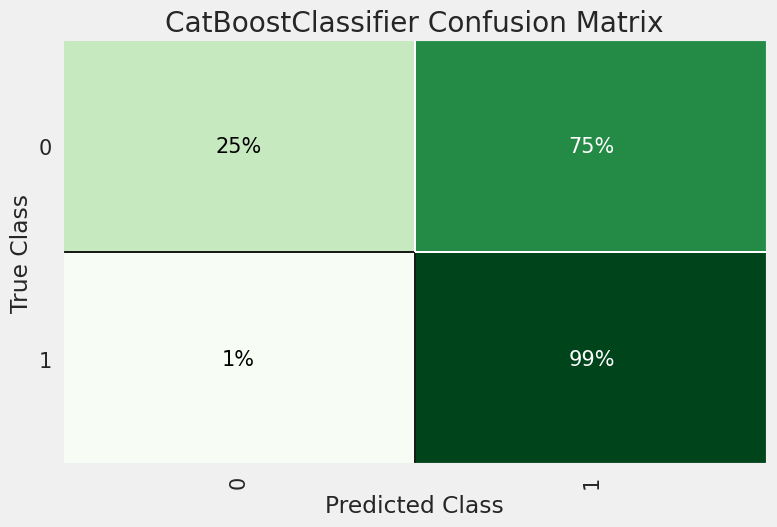

In [ ]:
# Plotting the confusion matrix
plot_model(catboost_smote, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

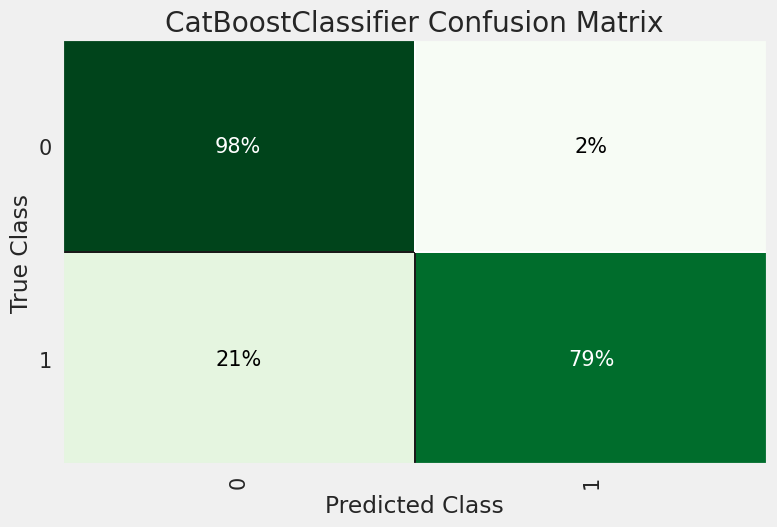

In [ ]:
plot_model(catboost, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

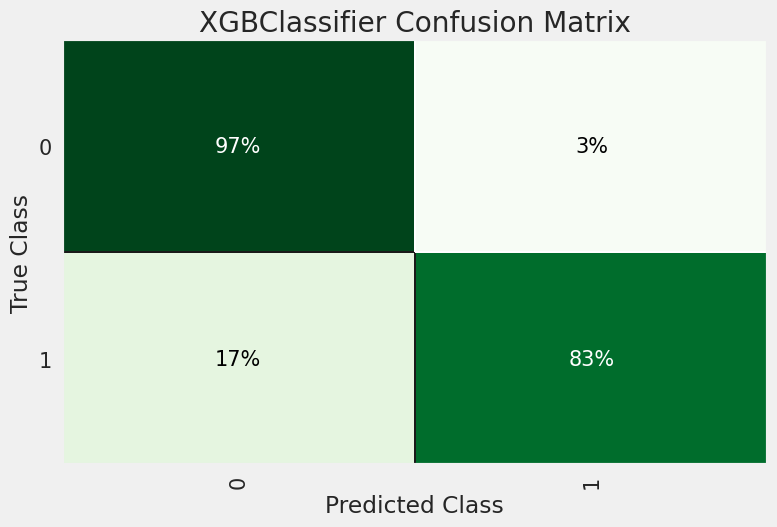

In [ ]:
plot_model(xgb_ros, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})



> Conclusion :

To prioritize true positives, XGBoost may be the better choice. On the other hand, if the goal is to prioritize true negatives, CatBoost without resampling could be the preferred model. However, using CatBoost with SMOTE resampling may result in a high number of false negatives, making it a less suitable option.


## Models interpretability

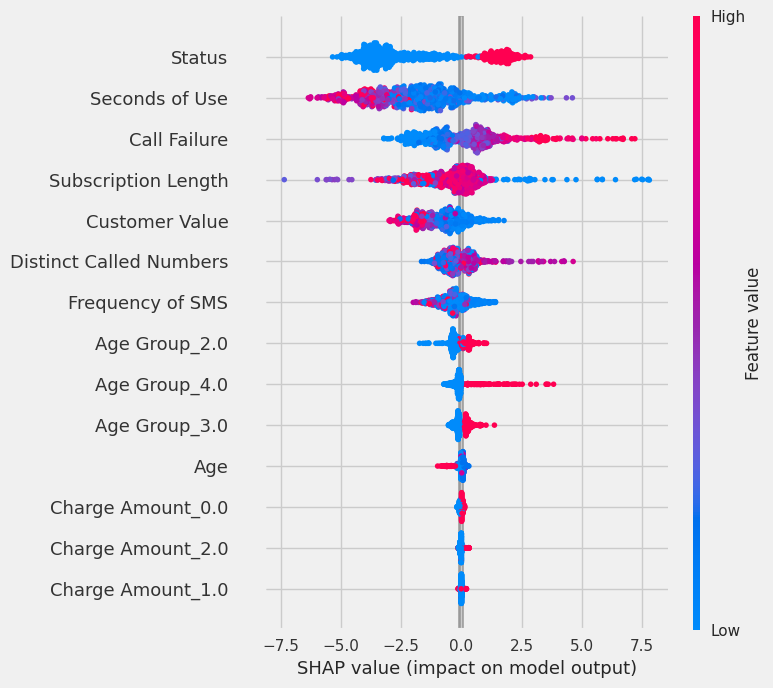

In [ ]:
# Plotting model intepretation
interpret_model(xgb_ros)

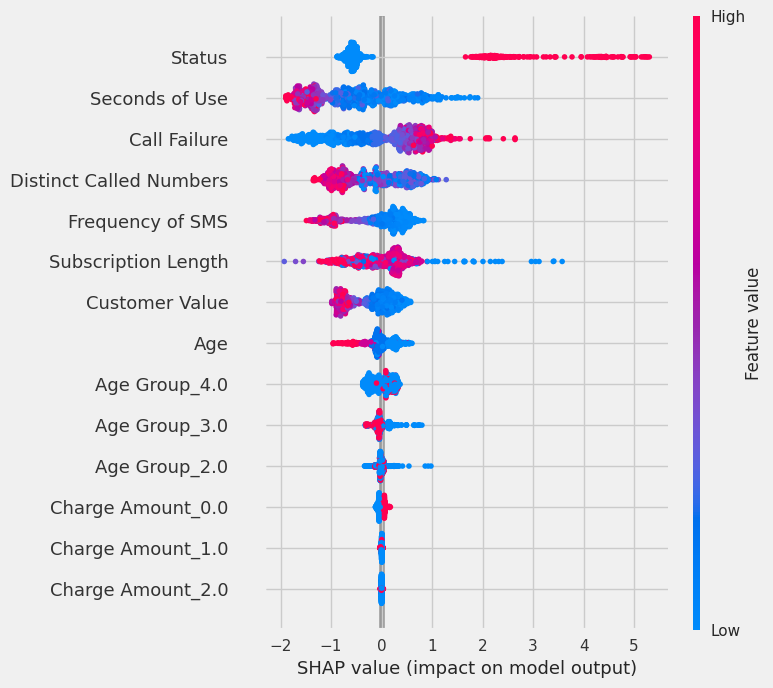

In [ ]:
interpret_model(catboost)

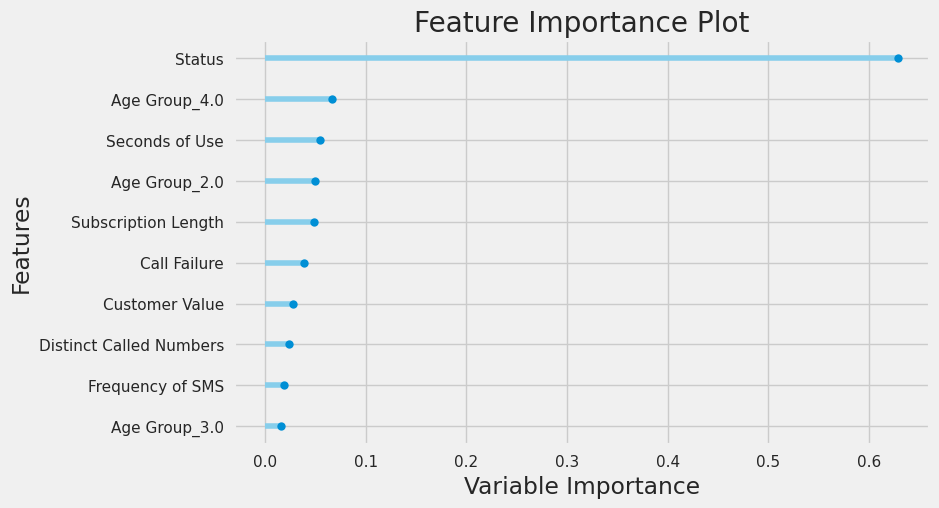

In [ ]:
# Plotting most import features for prediction
plot_model(xgb_ros, plot='feature')

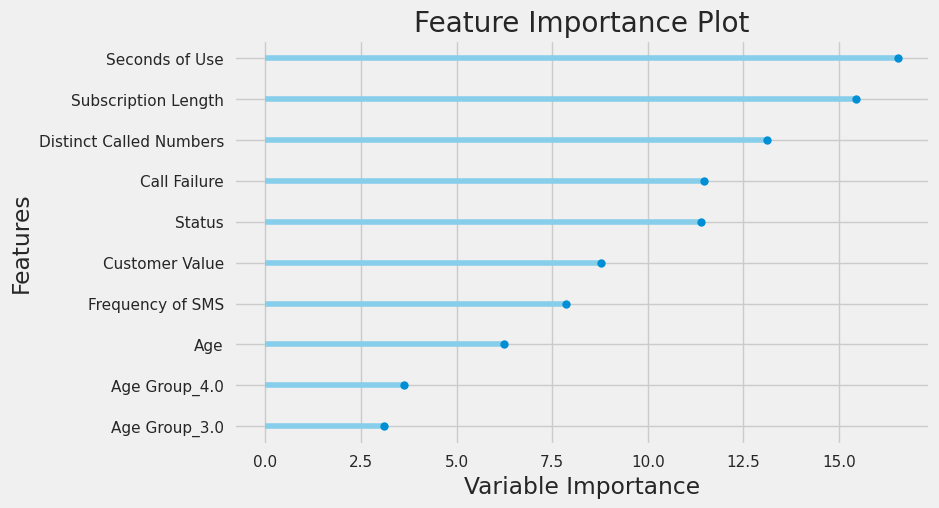

In [ ]:
plot_model(catboost, plot='feature')



> Conclusion :

* `XGboost` : the `"Status"` is highly important in predicting the target variable. The feature's contribution to the model's performance is relatively high compared to other features.

* `Catboost` : Based on the feature importance analysis using CatBoost, it can be concluded that the top features contributing to customer churn are seconds of use, subscription length, distinct called number, and call failure. However, it should be noted that there is not a significant difference in the feature importance among these top features. This suggests that these features are equally important in predicting customer churn and should be given equal consideration when developing a churn prediction model.
